In [3]:
import pandas as pd
import numpy as np 
from pylab import plt
from scipy.optimize import curve_fit
df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [4]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

# plot the salinity distribution for each snow depth bin 
def func_1(x,a,b):
    return 1/(a*x+b)
def func_2(x,a):
    return a/x

popt, pconv = curve_fit(func_1,salinity,snow_depth)



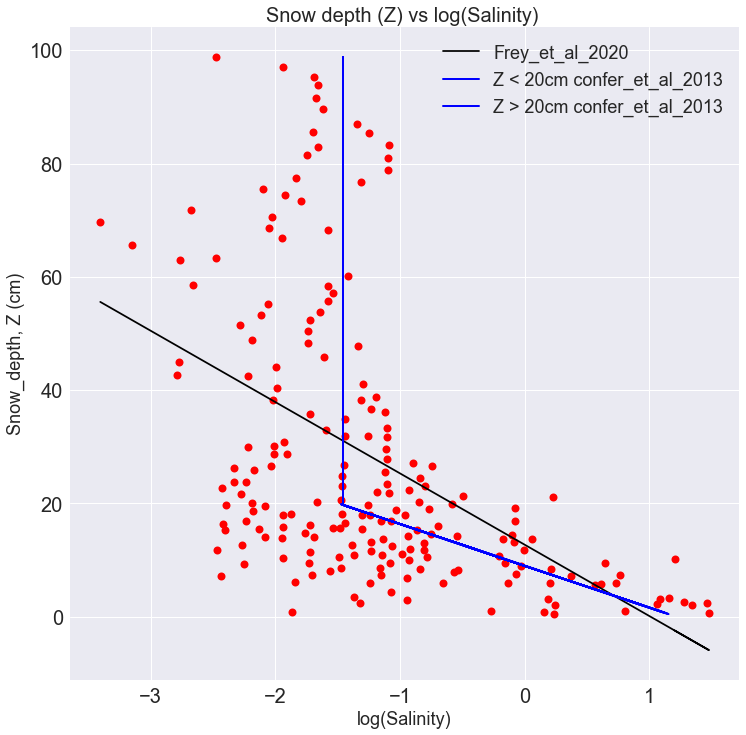

In [10]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'Frey_et_al_2020')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# inserting parametrisation from confer et al 2013

sp_confer_1 = 16.47 * np.exp(-0.312*sd_slice1) # z between 0 and 20 cm 
sp_confer_2 = np.array([0.035]*len(sd_slice2)) # for z >20 cm

plt.plot(np.log10(sp_confer_1), sd_slice1, 'b-', linewidth = 2, label = 'Z < 20cm confer_et_al_2013')
plt.plot(np.log10(sp_confer_2), sd_slice2, 'b-', linewidth = 2, label = 'Z > 20cm confer_et_al_2013')
plt.legend(fontsize = 18)

